## Visualisasi Data - Iris Dataset

In [1]:
# lib manipulasi data
import pandas as pd
import numpy as np

# lib visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# lib preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# load dataset
dataset = pd.read_csv("../dataset/dataset_iris.csv")

In [3]:
# Set features and Labels
x = dataset[["sepal_length","sepal_width","petal_length","petal_width"]].values
y = dataset["species"].values

### Visualisasi Data

In [4]:
def heatmap(dataset):
  # create heatmap corr
  fig, ax = plt.subplots(figsize=(8,4))
  sns.heatmap(
    dataset.corr(numeric_only=True), vmin=-1, vmax=1,
    cmap="viridis", annot=True, fmt=".3f", linewidths=1
  )

  # set labels
  ax.set_title("", fontsize=14)
  ax.set_xlabel("", fontsize=12)
  ax.set_ylabel("", fontsize=12)
  ax.grid(False)

  # show heatmap
  plt.tight_layout()
  plt.show()

In [5]:
def boxplot(dataset):

  # create barplot
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
  sns.boxplot(data=dataset, x="species", y="sepal_length", hue="species", ax=ax[0][0])
  sns.boxplot(data=dataset, x="species", y="sepal_width", hue="species", ax=ax[0][1])
  sns.boxplot(data=dataset, x="species", y="petal_length", hue="species", ax=ax[1][0])
  sns.boxplot(data=dataset, x="species", y="petal_width", hue="species", ax=ax[1][1])

  # set labels
  labels=[["sepal length","sepal width"], ["petal length","petal width"]]
  for i in range(2):
    for j in range(2):
      ax[i][j].set_title("Boxplot with feature "+str(labels[i][j]))
      ax[i][j].set_xlabel("", fontsize=12)
      ax[i][j].set_ylabel("", fontsize=12)
      ax[i][j].grid(True)
      
  # return values
  plt.tight_layout()
  plt.show()

In [6]:
# function scatter plot
def scatter(dataset):

  # create scatter plots
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
  sns.scatterplot(data=dataset, x="sepal_length", y="sepal_width", hue="species", ax=ax[0])
  sns.scatterplot(data=dataset, x="petal_length", y="petal_width", hue="species", ax=ax[1])

  # set labels
  labels = ["sepal_length and sepal_width", "petal_length and petal_width"]
  for i in range(2):
    ax[i].set_title("Scatterplot with feature "+str(labels[i]))
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].legend(loc='upper left')
    ax[i].grid(True)
    
  # show scatterplot
  plt.tight_layout()
  plt.show()

### MinMax Scaler

In [7]:
# process minmax scaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(x)

In [8]:
# results minmax scaler
MinMax = pd.concat([
  pd.DataFrame(scaled, columns=["sepal_length","sepal_width","petal_length","petal_width"]),
  pd.DataFrame(y, columns=["species"])
],axis=1)

In [9]:
# results minmax scaler
print(MinMax)

     sepal_length  sepal_width  petal_length  petal_width    species
0        0.222222     0.625000      0.067797     0.041667     setosa
1        0.166667     0.416667      0.067797     0.041667     setosa
2        0.111111     0.500000      0.050847     0.041667     setosa
3        0.083333     0.458333      0.084746     0.041667     setosa
4        0.194444     0.666667      0.067797     0.041667     setosa
..            ...          ...           ...          ...        ...
145      0.666667     0.416667      0.711864     0.916667  virginica
146      0.555556     0.208333      0.677966     0.750000  virginica
147      0.611111     0.416667      0.711864     0.791667  virginica
148      0.527778     0.583333      0.745763     0.916667  virginica
149      0.444444     0.416667      0.694915     0.708333  virginica

[150 rows x 5 columns]


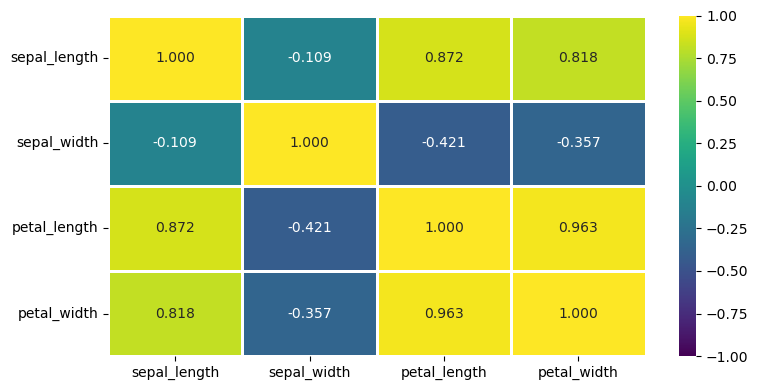

In [10]:
# results minmax with heatmap
heatmap(MinMax)

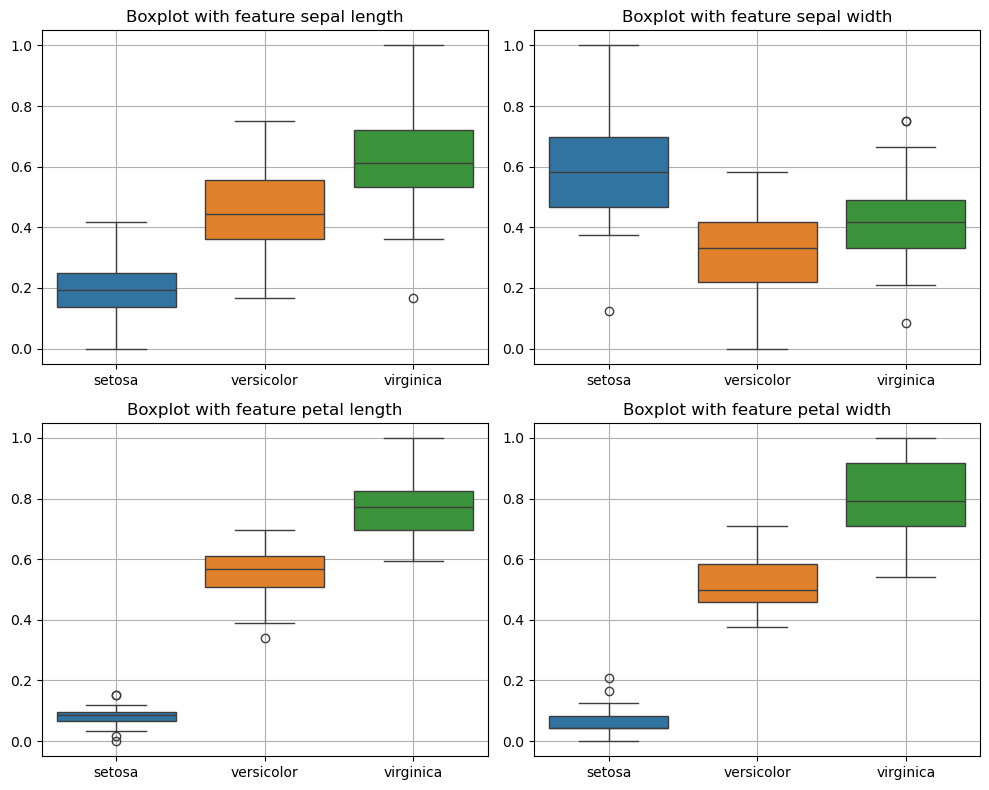

In [11]:
# results minmax with boxplot
boxplot(MinMax)

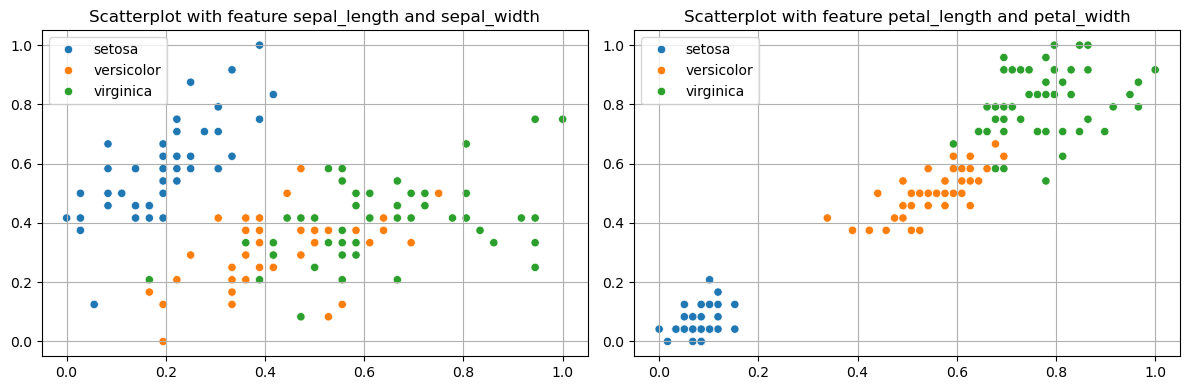

In [12]:
# results minmax with scatterplot
scatter(MinMax)

### Standard Scaler

In [13]:
# process standard scaler
scaled = StandardScaler().fit_transform(x)

In [14]:
# results standard scaler
standard = pd.concat([
  pd.DataFrame(scaled, columns=["sepal_length","sepal_width","petal_length","petal_width"]),
  pd.DataFrame(y, columns=["species"])
],axis=1)

In [15]:
# results standard scaler
print(standard)

     sepal_length  sepal_width  petal_length  petal_width    species
0       -0.900681     1.032057     -1.341272    -1.312977     setosa
1       -1.143017    -0.124958     -1.341272    -1.312977     setosa
2       -1.385353     0.337848     -1.398138    -1.312977     setosa
3       -1.506521     0.106445     -1.284407    -1.312977     setosa
4       -1.021849     1.263460     -1.341272    -1.312977     setosa
..            ...          ...           ...          ...        ...
145      1.038005    -0.124958      0.819624     1.447956  virginica
146      0.553333    -1.281972      0.705893     0.922064  virginica
147      0.795669    -0.124958      0.819624     1.053537  virginica
148      0.432165     0.800654      0.933356     1.447956  virginica
149      0.068662    -0.124958      0.762759     0.790591  virginica

[150 rows x 5 columns]


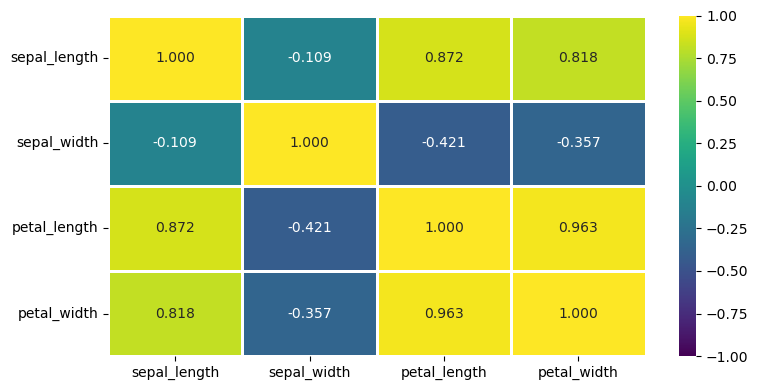

In [20]:
# results minmax with heatmap
heatmap(standard)

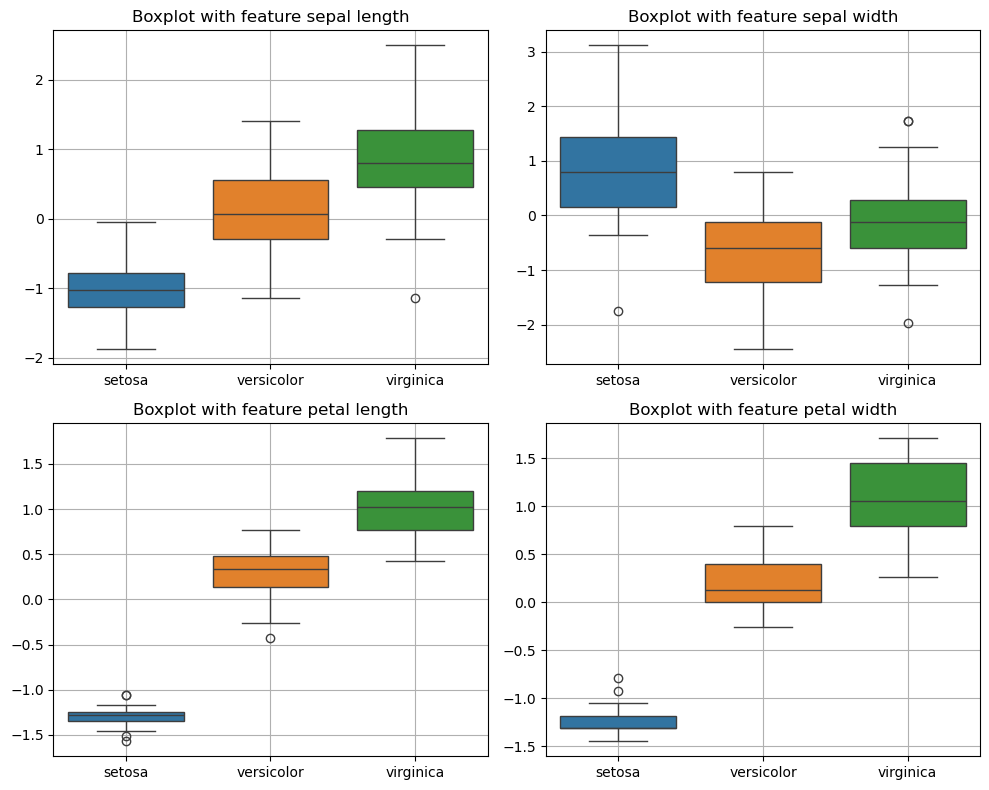

In [16]:
# results minmax with boxplot
boxplot(standard)

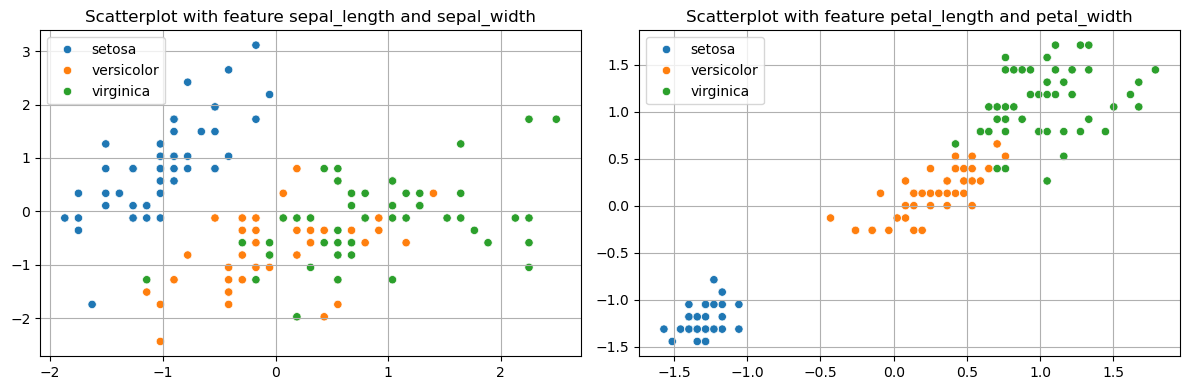

In [19]:
# results scaling
scatter(standard)

### Splitting Data

In [ ]:
# split validation
trainX, testX, trainY, testY = train_test_split(
  MinMax.iloc[:,0:4], MinMax.iloc[:,-1:], train_size=0.75, test_size=0.25, random_state=7, shuffle=True
)

In [ ]:
# show dimension of data train
print(trainX.shape, trainY.shape)

In [ ]:
# show dimension of data test
print(testX.shape, testY.shape)

In [ ]:
dataset

In [ ]:

sns.histplot(data=standard, x="sepal_width", hue="species", kde=True)

In [ ]:
labels = ["A", "B", "C", "D"]
for i in range(len(labels)):  # Use len(labels) to iterate through indices
  print(i, labels[i])   

In [ ]:
for i in range(2):
  for j in range(2):
    print(i,j)

In [ ]:
# set labels

for i in range(2):
  for j in range(2):
    print("Boxplot with feature "+str(labels[i][j]))

<Axes: xlabel='sepal_width', ylabel='Count'>

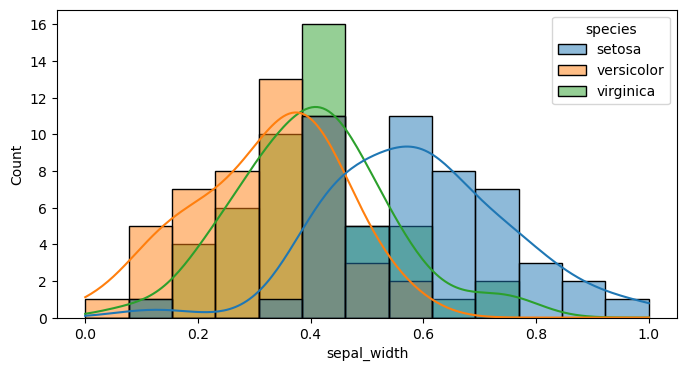

In [30]:
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(data=MinMax, x="sepal_width", hue="species", kde=True, bins="auto")